# 构造保存和加载模型

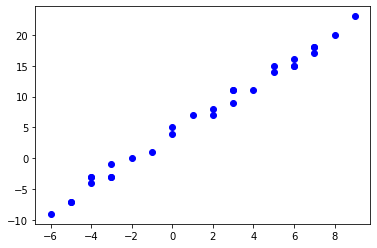

('weight', Parameter containing:
tensor([2.0367], requires_grad=True))
('bias', Parameter containing:
tensor([3.5620], requires_grad=True))
OrderedDict([('weight', tensor([2.0367])), ('bias', tensor([3.5620]))])
('weight', Parameter containing:
tensor([2.0367], requires_grad=True))
('bias', Parameter containing:
tensor([3.5620], requires_grad=True))
('weight', Parameter containing:
tensor([2.0367], requires_grad=True))
('bias', Parameter containing:
tensor([3.5620], requires_grad=True))


In [38]:
import numpy as np
import random
from matplotlib import pyplot as plt
import torch
from torch import nn

w = 2
b = 3
x_limit = [-10, 10]
x_train = np.random.randint(low=x_limit[0], high=x_limit[1], size=30)
y_train = [w*x+b+random.randint(0,2) for x in x_train]
plt.plot(x_train, y_train, 'bo')
plt.show()

# 创建一个模型
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1))
    self.bias = nn.Parameter(torch.randn(1))

  def forward(self, input):
    return (input * self.weight) + self.bias

# 训练模型
model = LinearModel()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, weight_decay=1e-2,momentum=0.9 )
y_train = torch.tensor(y_train, dtype=torch.float32)
for _ in torch.arange(0,1000):
    input = torch.from_numpy(x_train)
    output = model(input)
    loss = nn.MSELoss()(output, y_train)
    model.zero_grad()
    loss.backward()
    optimizer.step()

# 查看模型参数
for parameter in model.named_parameters():
    print(parameter)
print(model.state_dict())

# 保存和加载网络参数
torch.save(model.state_dict(), './temp/linear_model_parameters.pth')
linear_model = LinearModel()
linear_model.load_state_dict(torch.load('./temp/linear_model_parameters.pth'))
linear_model.eval()
for parameter in linear_model.named_parameters():
    print(parameter)

# 保存和加载网络结构和参数
torch.save(model, './temp/linear_model.pth')
linear_model2 = torch.load('./temp/linear_model.pth')
linear_model2.eval()
for parameter in linear_model2.named_parameters():
    print(parameter)